## import libraries and configuration

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import yaml, os

## Linear Regressor

In [16]:
# read configuration file
with open('lreg_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# set name of the directory to save data & results
config['dir']['prefix'] = 'lreg_example'
# create the directory if it doesn't exist
os.makedirs(config['dir']['prefix'], exist_ok=True)
# save the abs path just in case we get lost ..
config['dir']['cwd'] = os.path.join(os.path.abspath(os.getcwd()), config['dir']['prefix'])

# check if the input data's missing
if not os.path.exists(config['data']['input']):
    raise FileNotFoundError(f"Input data file not found: {config['data']['input']}")

# print the configuration
main_keys = ['dir', 'data', 'model', 'plot']
for key in main_keys:
    print(f'------------------------ {key} ------------------------')
    for sub_key, sub_value in config.get(key, {}).items():
        print(f"{sub_key}: {sub_value}")

------------------------ dir ------------------------
cwd: /Users/dnjf/AMW25/example/lreg_example
prefix: lreg_example
------------------------ data ------------------------
input: ./dummy_clean.csv
save: ./data
load: False
scale: True
random_seed: 42
train_ratio: 0.8
val_ratio: 0.1
input_col: ['temperature', 'seebeck', 'elec_cond', 'therm_cond', 'power_factor']
target_col: ['zT']
------------------------ model ------------------------
type: linear_regressor
save: ./model
------------------------ plot ------------------------
save: ./fig


In [5]:
os.getcwd()

'/Users/yujinkang/AMW25/tutorial'

In [ ]:
# pd.set_option('display.max_columns', None)
import pandas as pd
# df = pd.read_csv('/Users/yujinkang/AMW25/data/featurized/df_featurized.csv')
# df = df.drop(columns=['label'])
# df = df.drop_duplicates('formula')
# df_corr = df.drop(['formula', 'sg','composition'], axis=1)
# drop_keys = []
# for key in df_corr.columns:
#     if df_corr[key].std() == 0:
#         drop_keys.append(key)
# df_corr = df_corr.drop(columns=drop_keys)
# df_corr.to_csv(f'/Users/yujinkang/AMW25/data/featurized/df_corr.csv', index=False)
# # pd.reset_options("display.max_columns=None")
# # df

df_clean = df.drop(columns=['formula','label', 'sg','composition'])
# # df_clean.dropna(inplace=True)
# # df_clean.to_csv('/Users/yujinkang/AMW25/data/df_only_features.csv', index=False)
# # corr = df_clean.corr()
# # corr
df_both = pd.concat([df_sym, df_mat], axis=1)
df_both.to_csv(f'/Users/yujinkang/AMW25/data/data_both.csv', index=False)
df_both
df_mat = pd.read_csv('/Users/yujinkang/AMW25/data/data_mat.csv')

In [50]:
df_sym = pd.read_csv('/Users/yujinkang/AMW25/data/data_sym.csv')
df_sym_low = df_sym.drop_duplicates(keep='first')
df_sym_low = df_sym_low.drop(columns=['label', 'formula','sg','temperature'])
df_sym_low.to_csv(f'/Users/yujinkang/AMW25/data/data_sym_low.csv', index=False)

df_sym_high = df_sym.drop_duplicates(keep='last')
df_sym_high = df_sym_high.drop(columns=['label', 'formula','sg','temperature'])
df_sym_high.to_csv(f'/Users/yujinkang/AMW25/data/data_sym_high.csv', index=False)

pearson
kendall
spearman


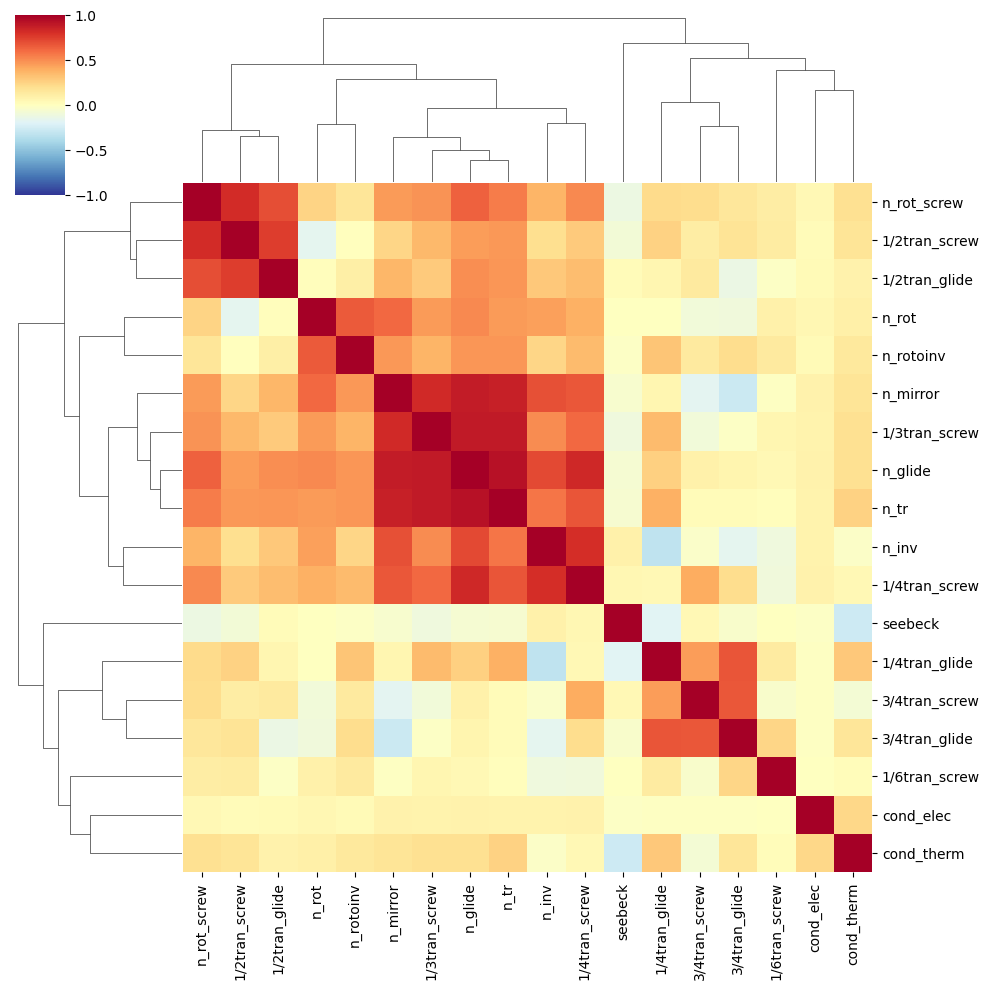

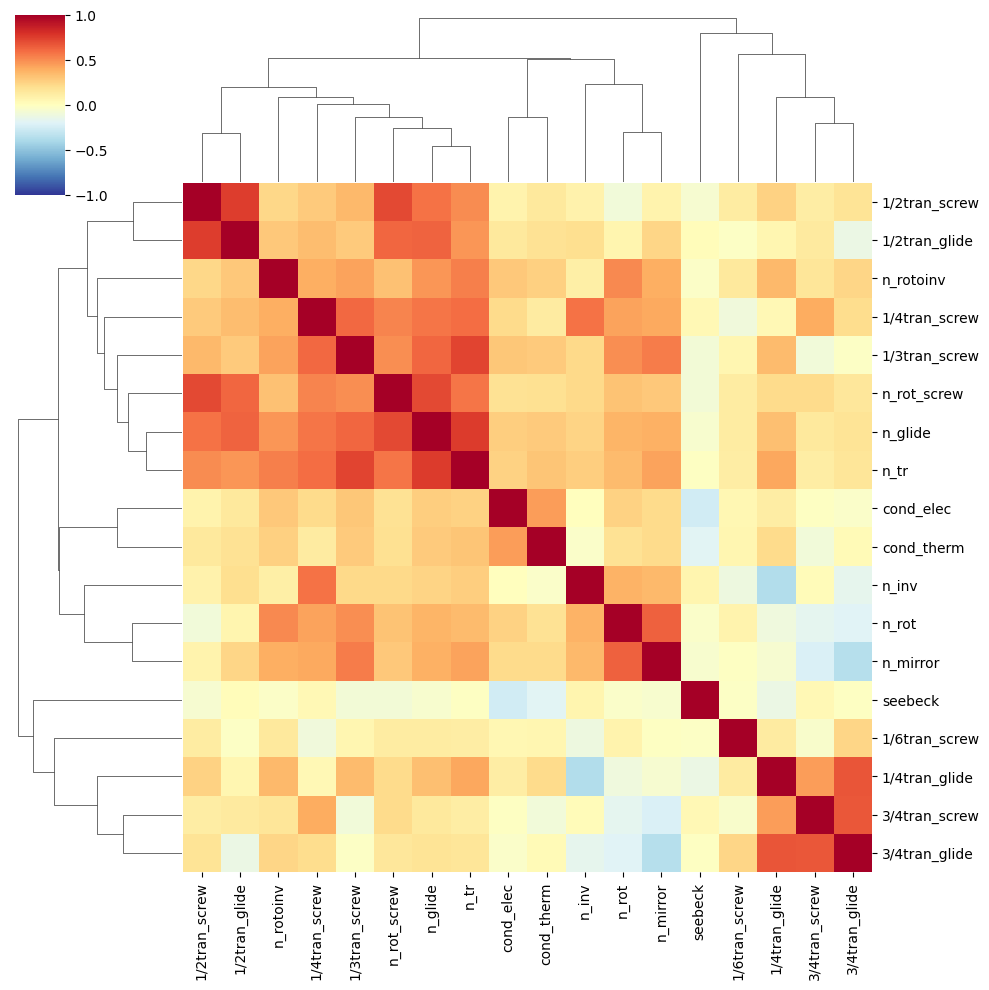

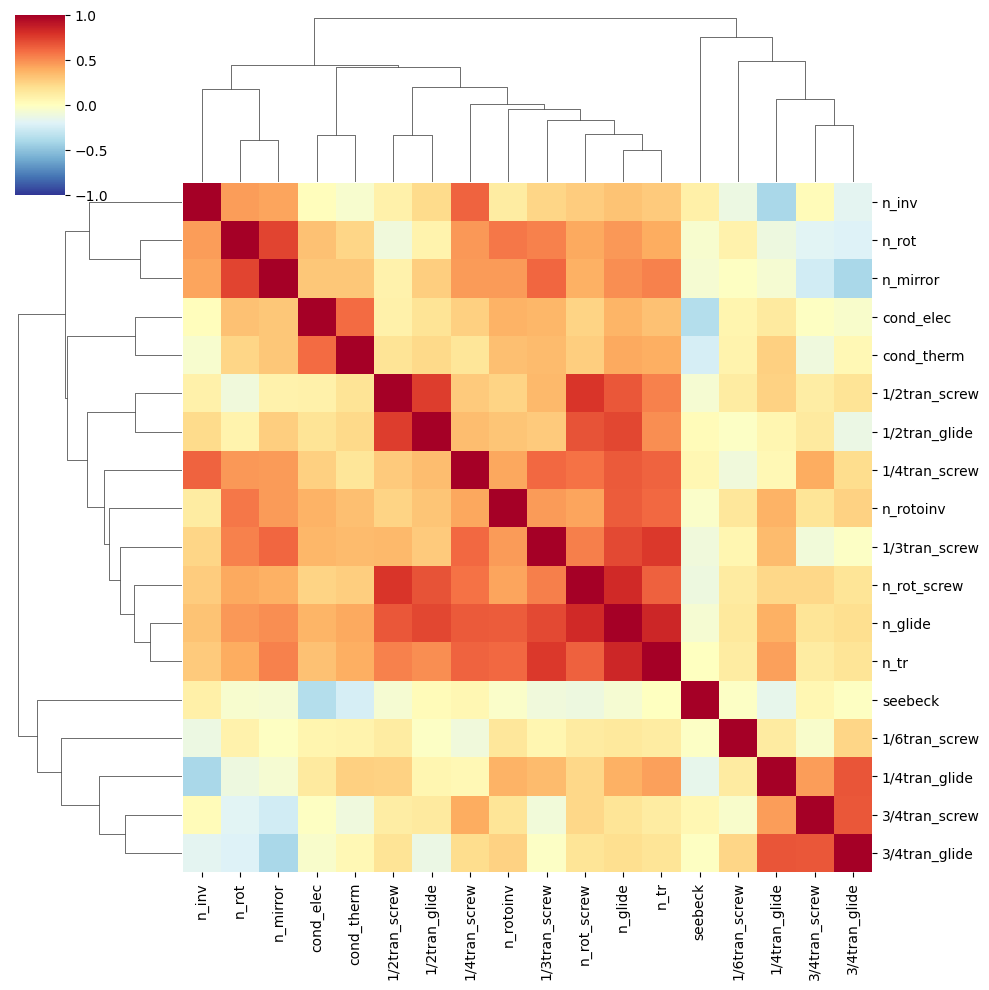

In [55]:
for corr in corrs:
    print(corr)
    sns.clustermap(df_sym_low.corr(corr), cmap='RdYlBu_r', annot=False, vmin=-1, vmax=1, figsize=(10, 10),)


pearson
kendall
spearman


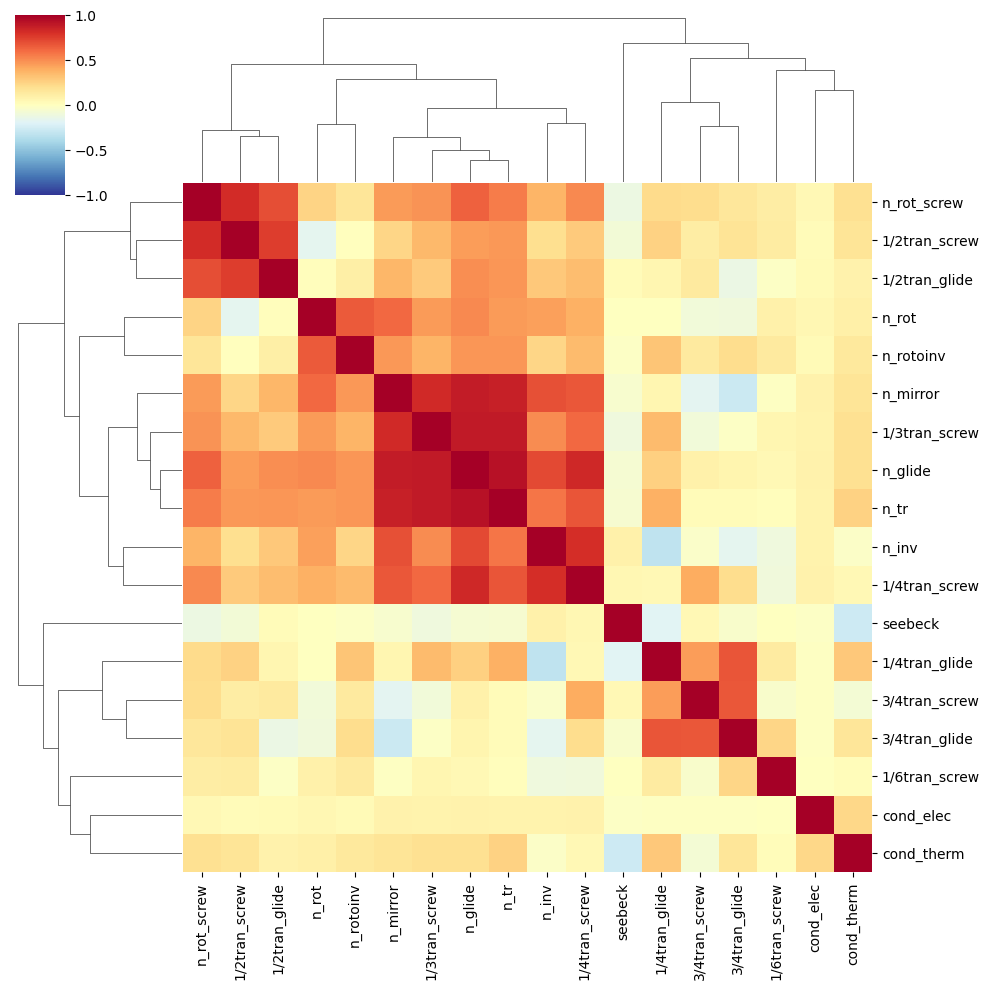

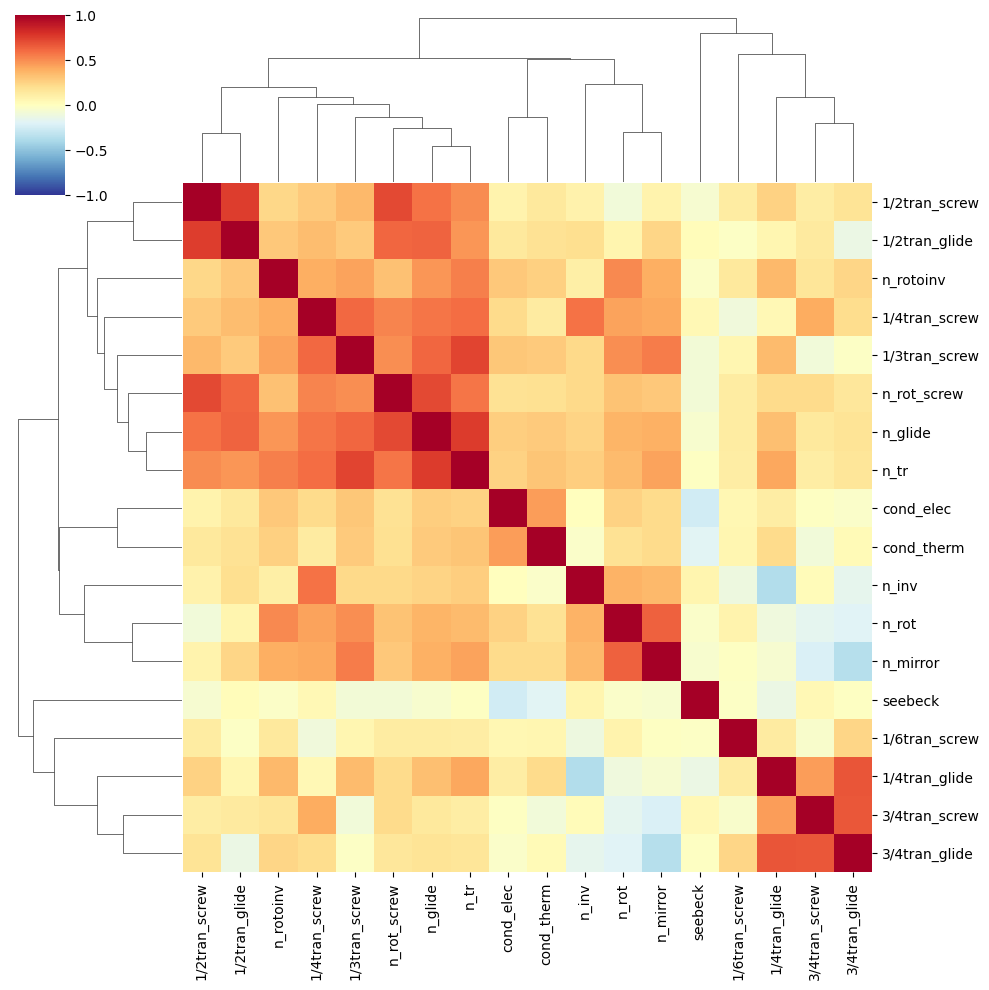

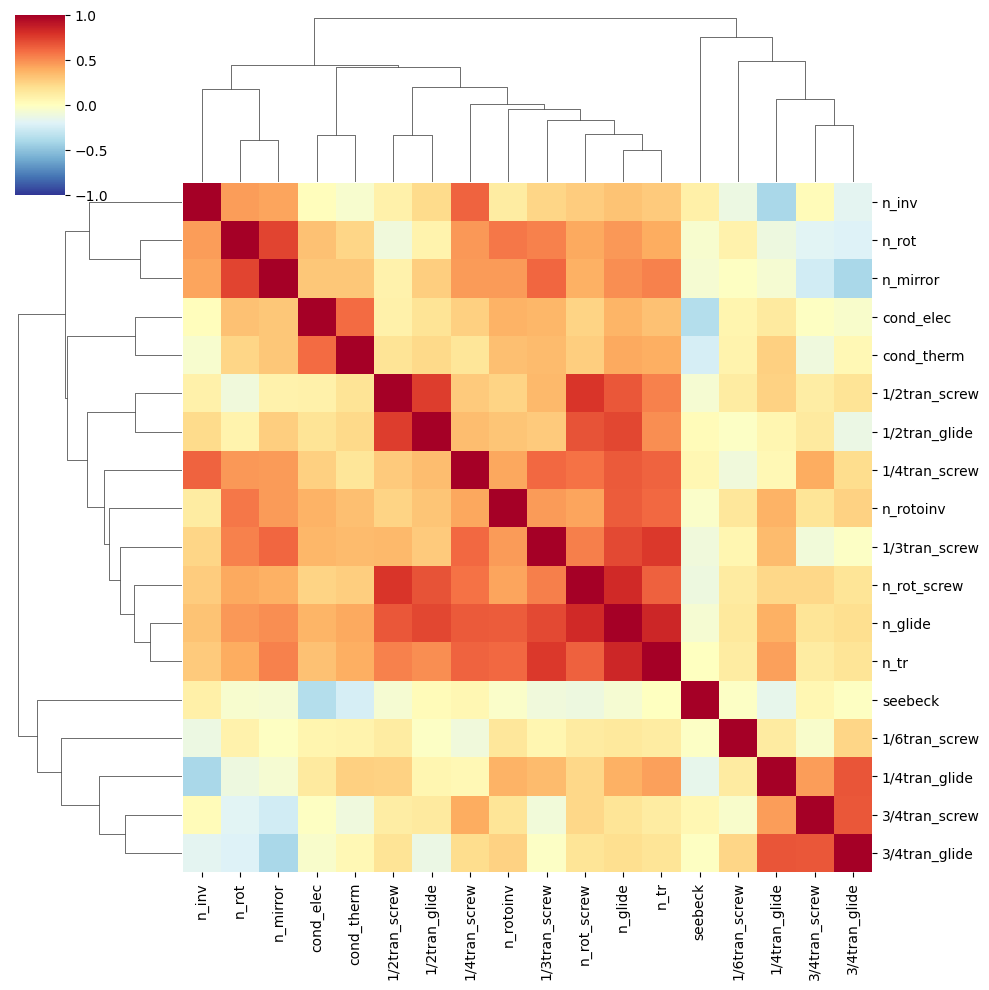

In [56]:
for corr in corrs:
    print(corr)
    sns.clustermap(df_sym_high.corr(corr), cmap='RdYlBu_r', annot=False, vmin=-1, vmax=1, figsize=(10, 10),)


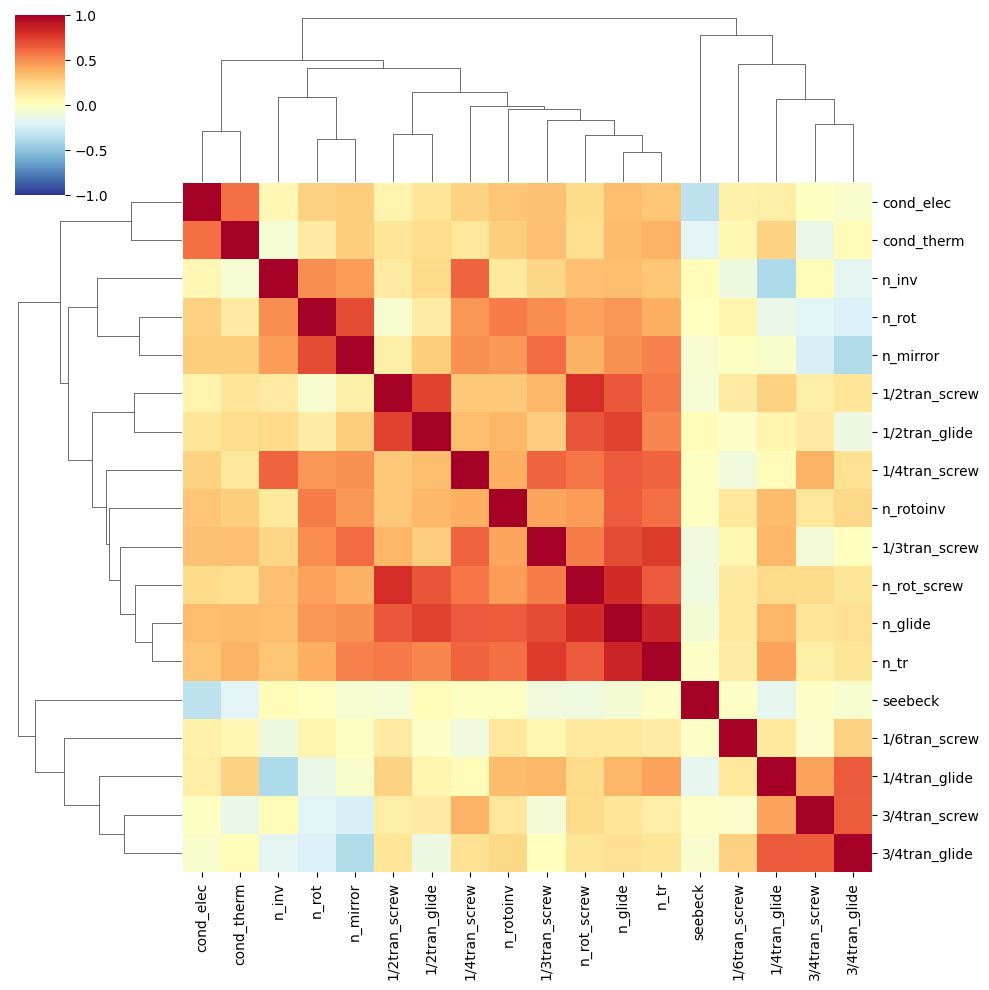

In [47]:
sns.clustermap(df_sym.corr('spearman'), cmap='RdYlBu_r', annot=False, vmin=-1, vmax=1, figsize=(10, 10),)

In [46]:
import numpy as np
X = np.hstack([sym_feature, onehot.values])
Temp = df['temperature'].values

## datapreprocessing

In [ ]:
df_feat

,formula,temperature,seebeck,cond_elec,cond_therm,power_factor,zT,sg_num,sg,rot,n_rot,inv,n_inv,rotoinv,n_rotoinv,mir,n_mirror,screw,n_rot_screw,1/2tran_screw,1/3tran_screw,3/4tran_screw,1/4tran_screw,1/6tran_screw,glide,n_glide,1/2tran_glide,3/4tran_glide,1/4tran_glide,tr,n_tr,label,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,